# Naive Bayes

###  Needed imports and libraries
Next are all the needed imports to run the script: 

In [34]:
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

### Preparing data
All the preprossecing of the data is done on other scripts. Therefore, we only have to open the csvs with the datasets already preprocessed: 

Moreover, we have also already splited the train and test data into different datasets, so we don't have to use the function train_test_split(). 

In [35]:
trainingDataset = pd.read_csv(r'../Datasets/training-dataset-reduced.csv')
testingDataset = pd.read_csv(r'../Datasets/testing-dataset-reduced.csv')
trainingDataset.info()
testingDataset.info()

X_trainDataset = trainingDataset
X_trainDataset =  X_trainDataset.drop('Unnamed: 0',axis=1) #non useful column
X_trainDataset =  X_trainDataset.drop('y',axis=1) #remove the column we want to predict

Y_trainDataset = trainingDataset
Y_trainDataset = Y_trainDataset['y'] #Only the column we want to predict

X_testDataset = testingDataset
X_testDataset =  X_testDataset.drop('Unnamed: 0',axis=1) #non useful column
X_testDataset =  X_testDataset.drop('y',axis=1) #remove the column we want to predict

Y_testDataset = testingDataset
Y_testDataset = Y_testDataset['y'] #Only the column we want to predict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6667 non-null   int64  
 1   age                            6667 non-null   float64
 2   campaign                       6667 non-null   float64
 3   cons.conf.idx                  6667 non-null   float64
 4   cons.price.idx                 6667 non-null   float64
 5   contact                        6667 non-null   float64
 6   day_of_week                    6667 non-null   float64
 7   default_unknown                6667 non-null   float64
 8   default_yes                    6667 non-null   float64
 9   duration                       6667 non-null   float64
 10  education_basic.6y             6667 non-null   float64
 11  education_basic.9y             6667 non-null   float64
 12  education_high.school          6667 non-null   f

### Prediction by cross-validation

Mean of the accuracy of all the splits: 0.7132177154665911


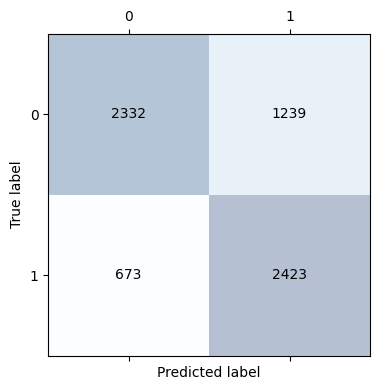

0.7132143392830359
              precision    recall  f1-score   support

         0.0       0.78      0.65      0.71      3571
         1.0       0.66      0.78      0.72      3096

    accuracy                           0.71      6667
   macro avg       0.72      0.72      0.71      6667
weighted avg       0.72      0.71      0.71      6667



In [36]:
cv = StratifiedKFold(n_splits=10) #We specigy the number of splits of cross-validation
gnb = GaussianNB() #We work with the gausian naive bayes

#X_trainDataset = pd.get_dummies(X_trainDataset)
cv_scores = cross_val_score(gnb,X=X_trainDataset,y=Y_trainDataset,cv=cv) #to get the mean of the perfomance of the predtictions of all the splits
predicted = cross_val_predict(GaussianNB(), X=X_trainDataset, y=Y_trainDataset,  cv=cv) #to get the perfomance of the predictions depending on the value of the predicted variable

#mean of the accuracy of all the splits
print("Mean of the accuracy of all the splits: {}".format(np.mean(cv_scores)))

#print the confusion matrix
confmat = confusion_matrix(Y_trainDataset, predicted)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

#print the accuracy score
print(accuracy_score(Y_trainDataset, predicted))

#print the classification report
print(classification_report(Y_trainDataset, predicted))




### Prediction by fit

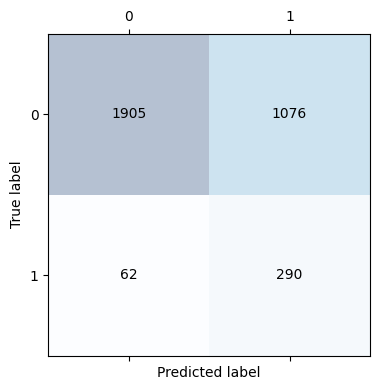

0.6585658565856586
              precision    recall  f1-score   support

         0.0       0.97      0.64      0.77      2981
         1.0       0.21      0.82      0.34       352

    accuracy                           0.66      3333
   macro avg       0.59      0.73      0.55      3333
weighted avg       0.89      0.66      0.72      3333



In [37]:
clf = GaussianNB() #We work with the gausian naive bayes
clf.fit(X_trainDataset,Y_trainDataset)#train by fit
y_predicted = clf.predict(X_testDataset)

#print the confusion matrix
confmat = confusion_matrix(Y_testDataset, y_predicted)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

#print the accuracy score
print(accuracy_score(Y_testDataset, y_predicted))

#print the classification report
print(classification_report(Y_testDataset, y_predicted))